# Libraries

In [ ]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from tensorflow.keras.optimizers import Adam

In [ ]:
import random
import os
import shutil

from numpy.random import seed
seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from tensorflow.random import set_seed
set_seed(42)


# **showing**

In [ ]:
import kagglehub

path = kagglehub.dataset_download("sreetejadusi/cats-vs-dogs")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cats-vs-dogs


Image shape: (374, 500, 3)


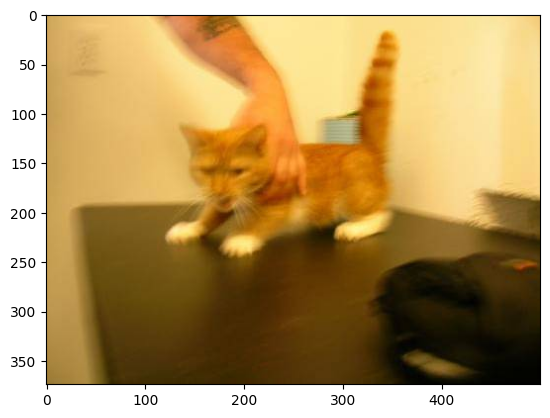

In [ ]:
# Load the image
img01 = Image.open(r"/kaggle/input/cats-vs-dogs/cats_and_dogs_filtered/train/cats/cat.0.jpg")

# Convert the image to a NumPy array
img01_array = np.array(img01)
# Display the shape of the array (height, width, channels)
print("Image shape:", img01_array.shape)

# Optional: Display the image to verify it loaded correctly
plt.imshow(img01)

# Data Configurations

In [ ]:
labels = ['cat', 'dog']
train_path = r'/kaggle/input/cats-vs-dogs/cats_and_dogs_filtered/train'
val_path = r'/kaggle/input/cats-vs-dogs/cats_and_dogs_filtered/validation'

# Data Loading

In [ ]:
X_train_raw, y_train_raw, X_val_raw, y_val_raw = [], [], [], []

for label in labels:
    path = os.path.join(train_path, label+'s')
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
        img_arr = cv2.resize(img_arr, (256, 256))
        X_train_raw.append(img_arr)
        y_train_raw.append(label)

In [ ]:
for label in labels:
    path = os.path.join(val_path, label+'s')
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
        img_arr = cv2.resize(img_arr, (256, 256))
        X_val_raw.append(img_arr)
        y_val_raw.append(label)

# Data Visualization & Info

In [ ]:
X_train_raw[0].shape

(256, 256, 3)

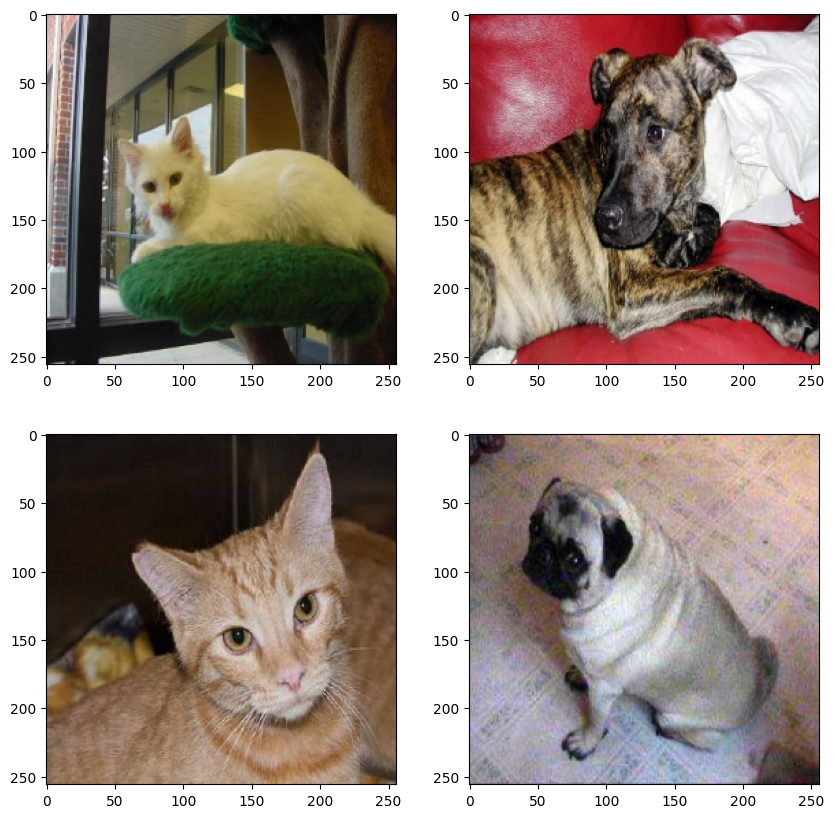

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0,0].imshow(X_train_raw[0])
ax[0,1].imshow(X_train_raw[1000])
ax[1,0].imshow(X_train_raw[32])
ax[1,1].imshow(X_train_raw[1234])

# **Normalization & Encoding**

In [ ]:
#Input Normalization
X_train = np.array(X_train_raw).astype('float32')/255
X_val = np.array(X_val_raw).astype('float32')/255

In [ ]:
X_train[0].shape

(256, 256, 3)

In [ ]:
X_train[0]

array([[[0.8117647 , 0.6862745 , 0.6666667 ],
        [0.7882353 , 0.6784314 , 0.64705884],
        [0.81960785, 0.70980394, 0.6784314 ],
        ...,
        [0.07058824, 0.05098039, 0.03921569],
        [0.05882353, 0.04313726, 0.03921569],
        [0.05882353, 0.04313726, 0.03921569]],

       [[0.8666667 , 0.73333335, 0.7176471 ],
        [0.78431374, 0.67058825, 0.6392157 ],
        [0.79607844, 0.6862745 , 0.6509804 ],
        ...,
        [0.06666667, 0.04705882, 0.03529412],
        [0.05882353, 0.04313726, 0.03921569],
        [0.05882353, 0.04313726, 0.03921569]],

       [[0.8509804 , 0.72156864, 0.7019608 ],
        [0.78039217, 0.6627451 , 0.6313726 ],
        [0.827451  , 0.7176471 , 0.6862745 ],
        ...,
        [0.06666667, 0.04705882, 0.03529412],
        [0.0627451 , 0.04313726, 0.04313726],
        [0.0627451 , 0.04705882, 0.04313726]],

       ...,

       [[0.08235294, 0.05490196, 0.10196079],
        [0.07843138, 0.05882353, 0.09411765],
        [0.07843138, 0

In [ ]:
# Convert labels from 'cat'/'dog' to 0/1
y_train = np.array([0 if label == 'cat' else 1 for label in y_train_raw])
y_val = np.array([0 if label == 'cat' else 1 for label in y_val_raw])


# **FFNN before changes**

In [ ]:
model_FFNN = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224,3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_FFNN.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     9,633,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,333,121 (39.42 MB)

 Trainable params: 10,333,121 (39.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_FFNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_FFNN = model_FFNN.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val), verbose=1)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 220ms/step - accuracy: 0.5141 - loss: 2.1179 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.5092 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 224ms/step - accuracy: 0.4825 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 205ms/step - accuracy: 0.5098 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - accuracy: 0.5298 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - accuracy: 0.5051 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - accuracy: 0.4917 - loss: 0.6932 - val_accu

# **FFNN Model**

In [ ]:
model_FFNN = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # Changed input_shape to (224, 224, 3)

    # Hidden layers
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Display model summary
model_FFNN.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    77,070,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,235,201 (294.63 MB)

 Trainable params: 77,235,201 (294.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model_FFNN.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
# Train the model
history_FFNN = model_FFNN.fit(
    X_train, y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.4985 - loss: 19.0791 - val_accuracy: 0.5330 - val_loss: 0.7321
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.5412 - loss: 2.7002 - val_accuracy: 0.5010 - val_loss: 0.6929
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.5288 - loss: 0.7063 - val_accuracy: 0.5580 - val_loss: 0.6898
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.4937 - loss: 0.6972 - val_accuracy: 0.5030 - val_loss: 0.6927
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.4669 - loss: 0.6929 - val_accuracy: 0.5190 - val_loss: 0.6907
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.5137 - loss: 0.6926 - val_accuracy: 0.5010 - val_loss: 0.6931
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.5068 - loss: 0.6932 - val_accuracy: 0.5010 - val_loss: 0.6930
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5203 - loss: 0.6931 - val_accuracy: 0.5010 - 

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model_FFNN.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 203ms/step - accuracy: 0.5238 - loss: 0.6572
Test accuracy: 0.5580


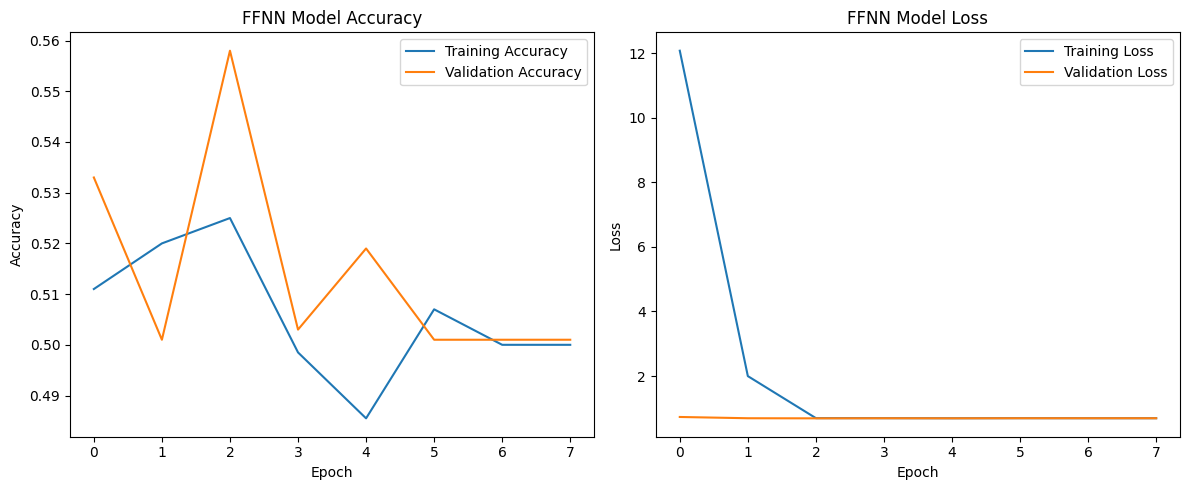

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_FFNN.history['accuracy'], label='Training Accuracy')
plt.plot(history_FFNN.history['val_accuracy'], label='Validation Accuracy')
plt.title('FFNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_FFNN.history['loss'], label='Training Loss')
plt.plot(history_FFNN.history['val_loss'], label='Validation Loss')
plt.title('FFNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


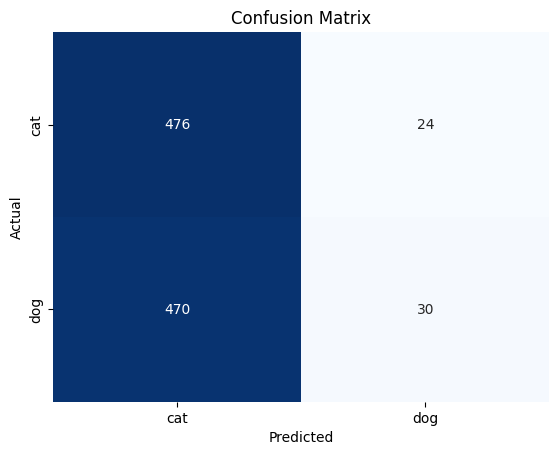

Classification Report:
              precision    recall  f1-score   support

         cat       0.50      0.95      0.66       500
         dog       0.56      0.06      0.11       500

    accuracy                           0.51      1000
   macro avg       0.53      0.51      0.38      1000
weighted avg       0.53      0.51      0.38      1000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Make predictions on the validation set
y_pred_prob = model_FFNN.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['cat', 'dog'], yticklabels=['cat', 'dog'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute classification report
report = classification_report(y_val, y_pred, target_names=['cat', 'dog'])
print("Classification Report:")
print(report)

In [ ]:
Best_FFNN_loaded_model = tf.keras.models.load_model('Best_FFNN.h5')

#Best_FFNN_loaded_model.summary()
Best_FFNN_loaded_model.evaluate(X_val, y_val)

# **CNN02 Model**

In [ ]:
model_CNN = tf.keras.models.Sequential([
    # Block 1 Conv
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.3),

    # Block 2 Conv
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='tanh'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.3),

    # Block 3 Conv
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='tanh'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.3),

    # Block 4 Conv
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='tanh'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_CNN.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,211,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,244,609 (12.38 MB)

 Trainable params: 3,244,609 (12.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_CNN.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_path = tf.keras.callbacks.ModelCheckpoint('Project_CNN04.h5', save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history_CNN02 = model_CNN.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val), callbacks=[checkpoint_path, early_stopping])

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5162 - loss: 0.7161

63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 147ms/step - accuracy: 0.5162 - loss: 0.7159 - val_accuracy: 0.5110 - val_loss: 0.7259
Epoch 2/100
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5973 - loss: 0.6586

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.5969 - loss: 0.6588 - val_accuracy: 0.5520 - val_loss: 0.7249
Epoch 3/100
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6312 - loss: 0.6303

63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.6307 - loss: 0.6305 - val_accuracy: 0.5720 - val_loss: 0.7012
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.6473 - loss: 0.6121 - val_accuracy: 0.5830 - val_loss: 0.7188
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.6722 - loss: 0.5953 - val_accuracy: 0.5680 - val_loss: 0.7755
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.6979 - loss: 0.5749 - val_accuracy: 0.5680 - val_loss: 0.8437
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.6953 - loss: 0.5707 - val_accuracy: 0.5680 - val_loss: 0.8744
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 0.7058 - loss: 0.5570 - val_accuracy: 0.5530 - val_loss: 0.9526
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.7170 - loss: 0.5480 - val_accuracy: 0.5580 - val_loss: 0.9318
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.7354 - loss: 0.5348 - val_accuracy: 0

# **Evaluating**

In [ ]:
test_loss, test_accuracy = model_CNN.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7855 - loss: 0.5159
Test accuracy: 0.5610


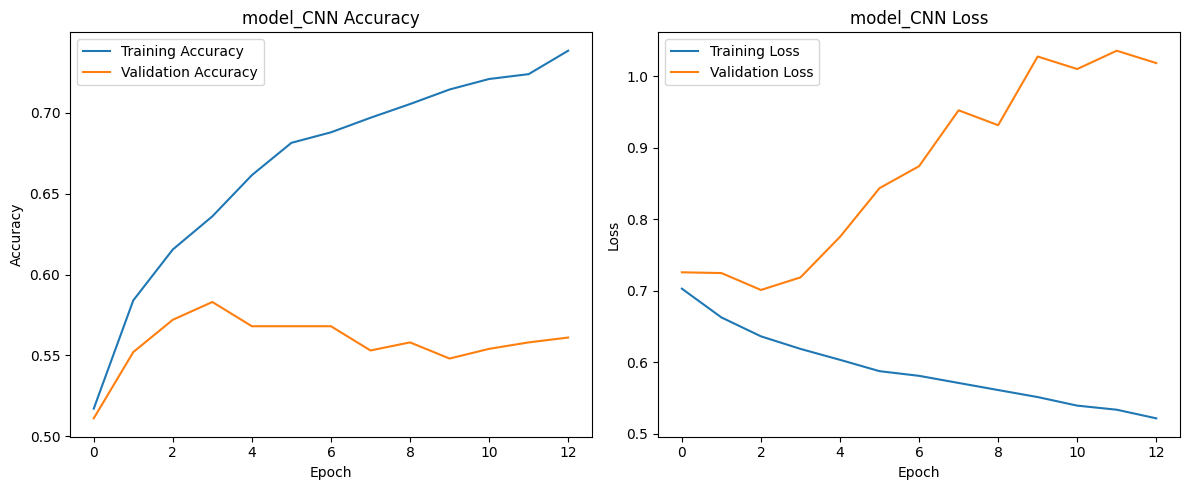

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_CNN02.history['accuracy'], label='Training Accuracy')
plt.plot(history_CNN02.history['val_accuracy'], label='Validation Accuracy')
plt.title('model_CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_CNN02.history['loss'], label='Training Loss')
plt.plot(history_CNN02.history['val_loss'], label='Validation Loss')
plt.title('model_CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **CNN01 Model**

In [ ]:
model_CNN = tf.keras.models.Sequential([
    # Block 1 Conv
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.3),

    # Block 2 Conv
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.3),

    # Block 3 Conv
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_CNN.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,769,697 (56.34 MB)

 Trainable params: 14,769,697 (56.34 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_CNN.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_path = tf.keras.callbacks.ModelCheckpoint('Project_CNN04.h5', save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history_CNN01 = model_CNN.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val), callbacks=[checkpoint_path, early_stopping])

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.4963 - loss: 0.7390

63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 150ms/step - accuracy: 0.4965 - loss: 0.7385 - val_accuracy: 0.5490 - val_loss: 0.6908
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5593 - loss: 0.6851

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.5590 - loss: 0.6851 - val_accuracy: 0.5690 - val_loss: 0.6880
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.5837 - loss: 0.6746

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - accuracy: 0.5835 - loss: 0.6746 - val_accuracy: 0.5800 - val_loss: 0.6819
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6062 - loss: 0.6564

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.6060 - loss: 0.6564 - val_accuracy: 0.5800 - val_loss: 0.6754
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6014 - loss: 0.6418

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.6013 - loss: 0.6419 - val_accuracy: 0.5820 - val_loss: 0.6716
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.6200 - loss: 0.6314

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.6200 - loss: 0.6315 - val_accuracy: 0.6030 - val_loss: 0.6623
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6364 - loss: 0.6181

63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.6363 - loss: 0.6182 - val_accuracy: 0.6090 - val_loss: 0.6565
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.6553 - loss: 0.6090

63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.6553 - loss: 0.6090 - val_accuracy: 0.6230 - val_loss: 0.6440
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6808 - loss: 0.5887

63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.6808 - loss: 0.5887 - val_accuracy: 0.6290 - val_loss: 0.6391
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.6814 - loss: 0.5819

63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - accuracy: 0.6814 - loss: 0.5820 - val_accuracy: 0.6400 - val_loss: 0.6291
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.7048 - loss: 0.5607

63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.7046 - loss: 0.5609 - val_accuracy: 0.6420 - val_loss: 0.6232
Epoch 12/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.7161 - loss: 0.5483

63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.7160 - loss: 0.5484 - val_accuracy: 0.6450 - val_loss: 0.6164
Epoch 13/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.7216 - loss: 0.5423

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.7215 - loss: 0.5424 - val_accuracy: 0.6540 - val_loss: 0.6114
Epoch 14/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.7335 - loss: 0.5255

63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.7333 - loss: 0.5257 - val_accuracy: 0.6490 - val_loss: 0.6084
Epoch 15/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.7305 - loss: 0.5241

63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.7304 - loss: 0.5242 - val_accuracy: 0.6510 - val_loss: 0.6017
Epoch 16/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.7511 - loss: 0.5094

63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.7510 - loss: 0.5096 - val_accuracy: 0.6620 - val_loss: 0.5961
Epoch 17/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.7625 - loss: 0.4929

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - accuracy: 0.7624 - loss: 0.4930 - val_accuracy: 0.6590 - val_loss: 0.5958
Epoch 18/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.7538 - loss: 0.4860

63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.7538 - loss: 0.4861 - val_accuracy: 0.6650 - val_loss: 0.5892
Epoch 19/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.7798 - loss: 0.4700

63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.7797 - loss: 0.4701 - val_accuracy: 0.6640 - val_loss: 0.5845
Epoch 20/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.7737 - loss: 0.4604

63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.7738 - loss: 0.4605 - val_accuracy: 0.6690 - val_loss: 0.5825
Epoch 21/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.7949 - loss: 0.4303 - val_accuracy: 0.6750 - val_loss: 0.5835
Epoch 22/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.7970 - loss: 0.4369

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.7970 - loss: 0.4370 - val_accuracy: 0.6800 - val_loss: 0.5713
Epoch 23/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.8158 - loss: 0.4171 - val_accuracy: 0.6820 - val_loss: 0.5720
Epoch 24/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8177 - loss: 0.3980

63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 182ms/step - accuracy: 0.8176 - loss: 0.3982 - val_accuracy: 0.6850 - val_loss: 0.5690
Epoch 25/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.8303 - loss: 0.3902 - val_accuracy: 0.6840 - val_loss: 0.5726
Epoch 26/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8266 - loss: 0.3787

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.8267 - loss: 0.3788 - val_accuracy: 0.6850 - val_loss: 0.5665
Epoch 27/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.8373 - loss: 0.3692 - val_accuracy: 0.6940 - val_loss: 0.5673
Epoch 28/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.8384 - loss: 0.3607 - val_accuracy: 0.6870 - val_loss: 0.5674
Epoch 29/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.8609 - loss: 0.3353 - val_accuracy: 0.6880 - val_loss: 0.5673
Epoch 30/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.8685 - loss: 0.3329 - val_accuracy: 0.6970 - val_loss: 0.5694
Epoch 31/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.8660 - loss: 0.3222 - val_accuracy: 0.7030 - val_loss: 0.5707
Epoch 32/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.8681 - loss: 0.2947 - val_accuracy: 0.6980 - val_loss: 0.5779
Epoch 33/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.8877 - loss: 0.2883 - val_accurac

# **Evaluating**

In [ ]:
test_loss, test_accuracy = model_CNN.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7496 - loss: 0.5253
Test accuracy: 0.6950


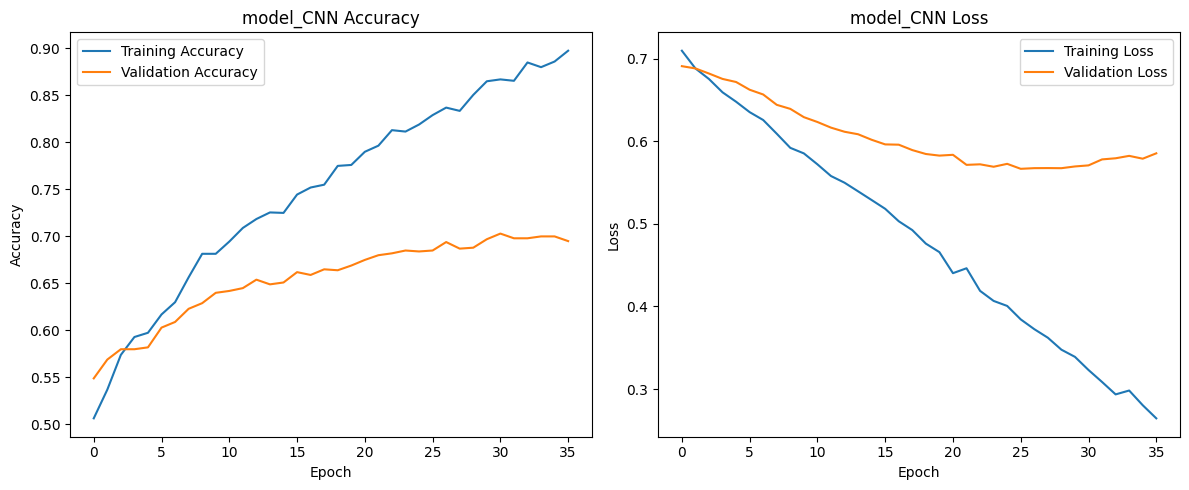

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_CNN01.history['accuracy'], label='Training Accuracy')
plt.plot(history_CNN01.history['val_accuracy'], label='Validation Accuracy')
plt.title('model_CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_CNN01.history['loss'], label='Training Loss')
plt.plot(history_CNN01.history['val_loss'], label='Validation Loss')
plt.title('model_CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **Pretrained CNN Model**

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
# Load pre-trained MobileNetV2 without top classification layer
base_model = MobileNetV2(
    input_tensor = tf.keras.layers.Input(shape=(256, 256, 3)),
    weights='imagenet',
    include_top=False,
)

# Freeze the base model layers
base_model.trainable = False

# Create a new model on top
model_CNN = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_CNN.summary()

<ipython-input-22-4bd37c623edd>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 8, 8, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 81920)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    20,971,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,246,273 (88.68 MB)

 Trainable params: 20,988,289 (80.06 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
model_CNN.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_path = tf.keras.callbacks.ModelCheckpoint('Project_CNN04.h5', save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history_CNN = model_CNN.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val), callbacks=[checkpoint_path, early_stopping])

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_324']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8733 - loss: 0.3990

63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 288ms/step - accuracy: 0.8743 - loss: 0.3968 - val_accuracy: 0.9820 - val_loss: 0.0624
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - accuracy: 0.9656 - loss: 0.1368 - val_accuracy: 0.9870 - val_loss: 0.0641
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9798 - loss: 0.0848

63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 211ms/step - accuracy: 0.9798 - loss: 0.0848 - val_accuracy: 0.9880 - val_loss: 0.0480
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 125ms/step - accuracy: 0.9883 - loss: 0.0334 - val_accuracy: 0.9870 - val_loss: 0.0693
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - accuracy: 0.9901 - loss: 0.0389 - val_accuracy: 0.9860 - val_loss: 0.0834
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.9887 - loss: 0.0551 - val_accuracy: 0.9900 - val_loss: 0.0616
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.9933 - loss: 0.0302 - val_accuracy: 0.9890 - val_loss: 0.0635
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.9932 - loss: 0.0250 - val_accuracy: 0.9850 - val_loss: 0.0945
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.9906 - loss: 0.0328 - val_accuracy: 0.9880 - val_loss: 0.0668
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - accuracy: 0.9955 - loss: 0.0285 - val_accuracy: 0.9880 - 

# **Evaluating**

In [ ]:
test_loss, test_accuracy = model_CNN.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.9899 - loss: 0.1040
Test accuracy: 0.9900


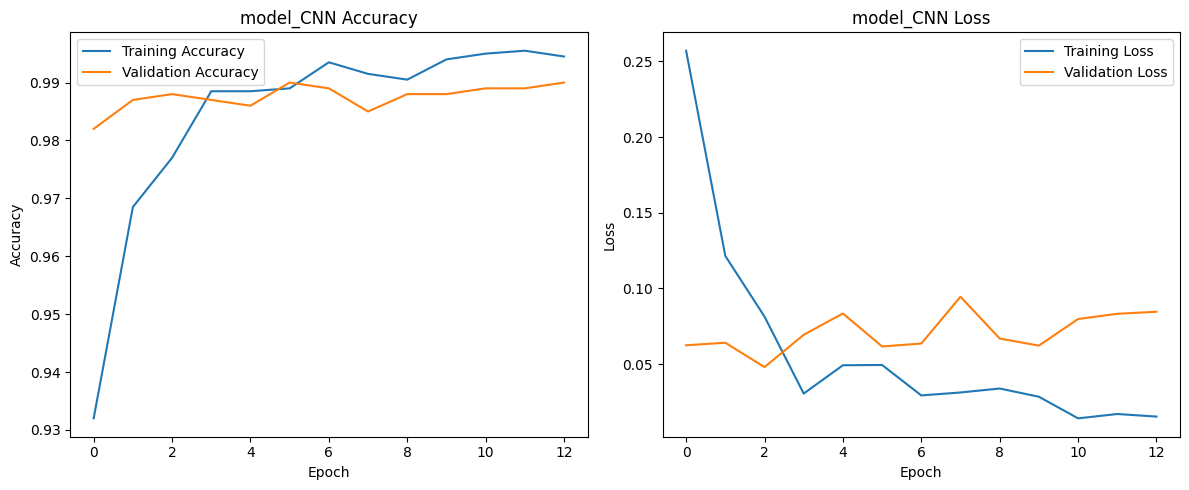

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_CNN.history['accuracy'], label='Training Accuracy')
plt.plot(history_CNN.history['val_accuracy'], label='Validation Accuracy')
plt.title('model_CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_CNN.history['loss'], label='Training Loss')
plt.plot(history_CNN.history['val_loss'], label='Validation Loss')
plt.title('model_CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step


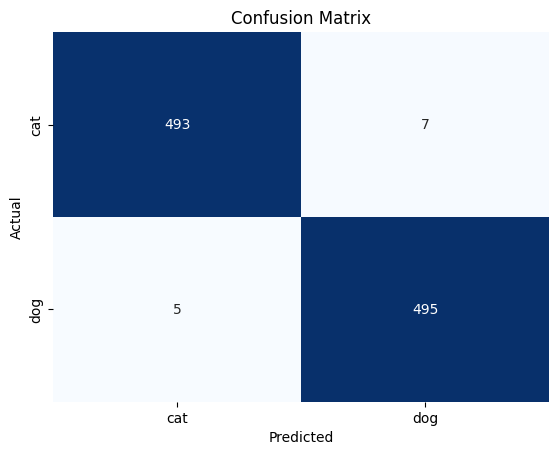

Classification Report:
              precision    recall  f1-score   support

         cat       0.99      0.99      0.99       500
         dog       0.99      0.99      0.99       500

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Make predictions on the validation set
y_pred_prob = model_CNN.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute classification report
report = classification_report(y_val, y_pred, target_names=labels)
print("Classification Report:")
print(report)

In [ ]:

Best_CNN_loaded_model = tf.keras.models.load_model('Best_CNN.h5')

#Best_CNN_loaded_model.summary()
Best_CNN_loaded_model.evaluate(X_val, y_val)

# RNN

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=30,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.05,
                                   height_shift_range=0.05,
                                   brightness_range=[0.8, 1.2],
                                   channel_shift_range=30.0,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
training_set = train_datagen.flow_from_directory('C:/Users/salma/Desktop/work+school+documents/uni/Year 4/Semester 2/Neural Networks/project/cats_and_dogs_filtered/train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 color_mode = 'rgb')

validation_set = validation_datagen.flow_from_directory('C:/Users/salma/Desktop/work+school+documents/uni/Year 4/Semester 2/Neural Networks/project/cats_and_dogs_filtered/validation',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 color_mode = 'rgb')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


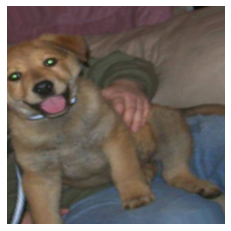

In [ ]:
# matplot verification of image
import matplotlib.pyplot as plt

images, labels = next(training_set)
plt.imshow(images[0])
plt.axis('off')
plt.show()

In [ ]:
import keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape, SimpleRNN, Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

# CNN part
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

# Flatten spatial dims into a sequence
model.add(Reshape((-1, 64)))

# RNN part
model.add(SimpleRNN(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(training_set, validation_data=validation_set, epochs=10, callbacks=[early_stop])

model.evaluate(validation_set)

Epoch 1/10
63/63 [==============================] - 442s 7s/step - loss: 0.6979 - accuracy: 0.4995 - val_loss: 0.6872 - val_accuracy: 0.5500
Epoch 2/10
63/63 [==============================] - 413s 7s/step - loss: 0.6894 - accuracy: 0.5330 - val_loss: 0.6899 - val_accuracy: 0.5360
Epoch 3/10
63/63 [==============================] - 479s 8s/step - loss: 0.6941 - accuracy: 0.5210 - val_loss: 0.6844 - val_accuracy: 0.5360
Epoch 4/10
63/63 [==============================] - 449s 7s/step - loss: 0.6841 - accuracy: 0.5395 - val_loss: 0.6783 - val_accuracy: 0.5360
Epoch 5/10
63/63 [==============================] - 400s 6s/step - loss: 0.7017 - accuracy: 0.5315 - val_loss: 0.7934 - val_accuracy: 0.5000
Epoch 6/10
32/32 [==============================] - 36s 1s/step - loss: 0.6913 - accuracy: 0.5330


[0.6912790536880493, 0.5329999923706055]

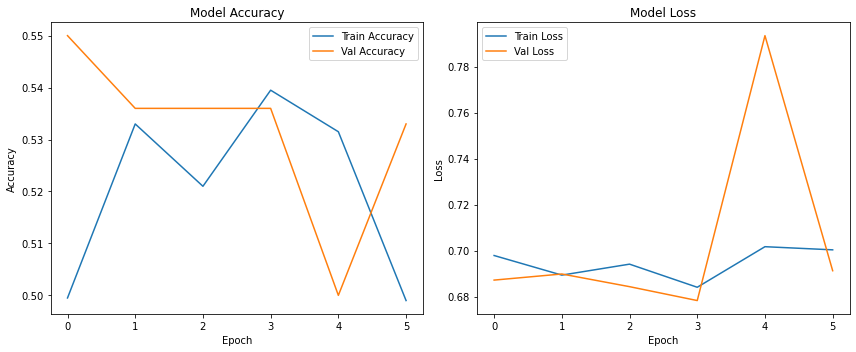

In [ ]:
#Training-Validation Accuracy-Loss Graphs
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, SimpleRNN, Dense, GRU, LSTM
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


pretrained_cnn = MobileNetV2(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
pretrained_cnn.trainable = False  # freeze weights

# --- Build model ---
model = Sequential()

# CNN part (as a layer)
model.add(pretrained_cnn)

model.add(Reshape((-1, 1280)))

# RNN part
model.add(SimpleRNN(64, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(training_set, validation_data=validation_set, epochs=10, callbacks=[early_stop])

model.evaluate(validation_set)


Epoch 1/10
63/63 [==============================] - 179s 3s/step - loss: 0.5569 - accuracy: 0.7150 - val_loss: 0.3873 - val_accuracy: 0.8360
Epoch 2/10
63/63 [==============================] - 159s 3s/step - loss: 0.4212 - accuracy: 0.8400 - val_loss: 0.3027 - val_accuracy: 0.9030
Epoch 3/10
63/63 [==============================] - 157s 2s/step - loss: 0.4848 - accuracy: 0.8060 - val_loss: 0.3261 - val_accuracy: 0.8940
Epoch 4/10
32/32 [==============================] - 44s 1s/step - loss: 0.3630 - accuracy: 0.8770


[0.36302536725997925, 0.8769999742507935]

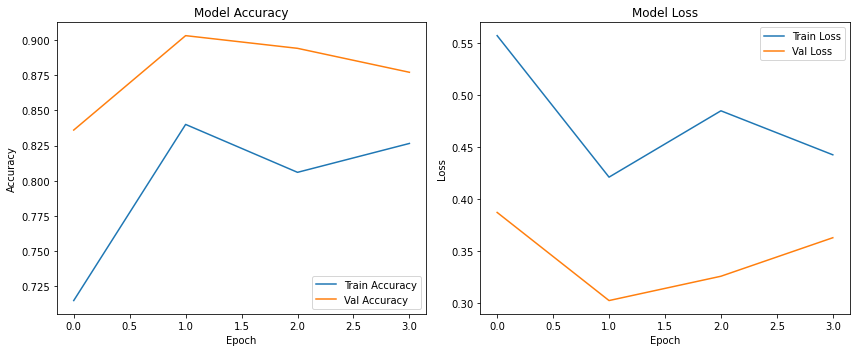

In [ ]:
#Training-Validation Accuracy-Loss Graphs

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Dense, GRU, Bidirectional, Input, Dropout
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from keras_self_attention import SeqWeightedAttention

#Pretrained CNN
pretrained_cnn = Xception(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
pretrained_cnn.trainable = False

#Build model
model = Sequential()

# CNN part
model.add(pretrained_cnn)
model.add(Reshape((-1, 2048)))   #number of features is fixed for each pre-trained model

# RNN part
model.add(Bidirectional(GRU(64, activation='relu', return_sequences=True)))
model.add(SeqWeightedAttention())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5)
check_point = ModelCheckpoint('best_model_CatsnDogs.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model.fit(training_set, validation_data=validation_set, epochs=15, callbacks=[early_stop,check_point])

model.evaluate(validation_set)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 reshape_1 (Reshape)         (None, 64, 2048)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64, 128)          811776    
 nal)                                                            
                                                                 
 seq_weighted_attention_1 (S  (None, 128)              129       
 eqWeightedAttention)                                            
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                

[0.022560710087418556, 0.9929999709129333]

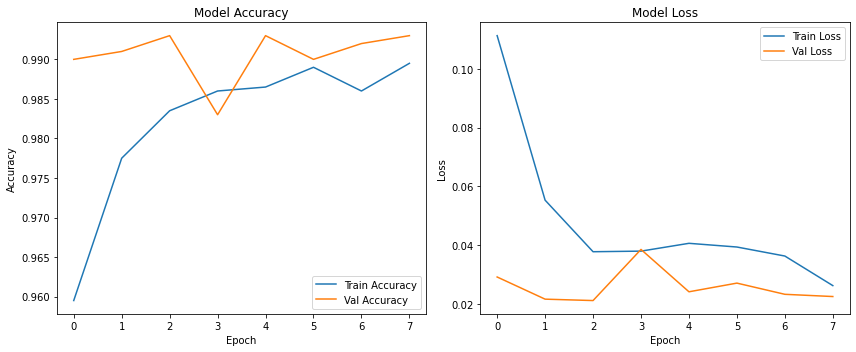

In [ ]:
#Training-Validation Accuracy-Loss Graphs

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Class indices: {'cats': 0, 'dogs': 1}
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 275ms/step


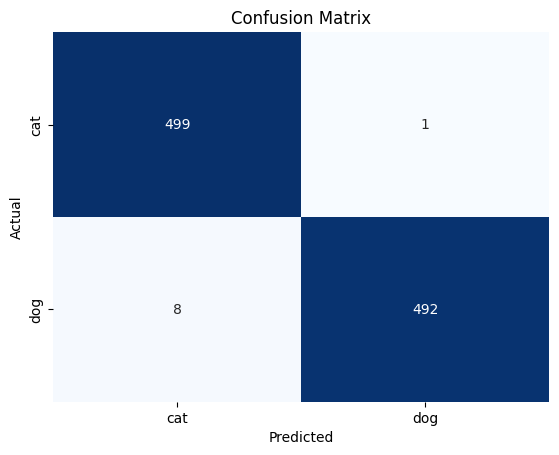

Classification Report:
              precision    recall  f1-score   support

         cat       0.98      1.00      0.99       500
         dog       1.00      0.98      0.99       500

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Print class indices for verification
print("Class indices:", validation_set.class_indices)

# Get true labels
true_labels = validation_set.classes

# Get predictions
predictions = model.predict(validation_set)

# Convert predictions to class labels
predicted_labels = (predictions > 0.5).astype(int).reshape(-1)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['cat', 'dog'], yticklabels=['cat', 'dog'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=['cat', 'dog'])
print("Classification Report:")
print(report)

In [ ]:
# Load the saved model with custom objects
from keras_self_attention import SeqWeightedAttention
best_RNN_loaded_model = tf.keras.models.load_model('best_RNN.h5', custom_objects={'SeqWeightedAttention': SeqWeightedAttention})

#best_RNN_loaded_model.summary()
best_RNN_loaded_model.evaluate(validation_set)